In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


import matplotlib.pyplot as plt
import os

Using TensorFlow backend.
f:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
f:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
f:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
f:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

In [3]:
x_train = np.load('E:/IDS/alldata/12/RUS+SMOTE/data.npy')
y_train = np.load('E:/IDS/alldata/12/RUS+SMOTE/label_10.npy')

x_test = np.load('E:/IDS/alldata/12/test/data.npy')
y_test = np.load('E:/IDS/alldata/12/test/label_10.npy')

x_val = np.load('E:/IDS/alldata/12/val/data.npy')
y_val = np.load('E:/IDS/alldata/12/val/label_10.npy')

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape)

(1778030, 12) (1778030, 1) (508012, 12) (508012, 1) (254005, 12) (254005, 1)


In [4]:
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape)) 
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))  
    return encoded

y_train_onehot = encode(y_train)
y_test_onehot = encode(y_test)
y_val_onehot = encode(y_val)

Shape of data (BEFORE encode): (1778030, 1)
Shape of data (AFTER  encode): (1778030, 10)

Shape of data (BEFORE encode): (508012, 1)
Shape of data (AFTER  encode): (508012, 10)

Shape of data (BEFORE encode): (254005, 1)
Shape of data (AFTER  encode): (254005, 10)



In [5]:
from keras import regularizers 

model = Sequential()
model.add(Dense(input_dim = 12,
                units = 128,
                activation = 'relu')) 


model.add(Dense(units = 128,activation = 'relu'))

model.add(Dense(units = 64, activation = 'relu'))

model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(units = 10,activation = 'softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 28,842
Trainable params: 28,842
Non-trainable params: 0
_________________________________________________________________
None


# train

In [6]:
import keras

import time
time_start = time.time()

callback_list = [keras.callbacks.EarlyStopping(monitor='val_acc',patience=30,),  
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_acc',save_best_only=True,)]

model.compile(loss = "categorical_crossentropy",optimizer = "nadam", metrics = ["accuracy"])
history = model.fit(x = x_train,y = y_train_onehot,
                epochs = 100,
                batch_size = 256,
                verbose = 2,
                callbacks=callback_list,
                validation_data=(x_val, y_val_onehot) )

time_end = time.time()
train_time = time_end - time_start
print("train_time:",train_time)

Instructions for updating:
Use tf.cast instead.
Train on 1778030 samples, validate on 254005 samples
Epoch 1/100
 - 8s - loss: 0.9007 - acc: 0.6461 - val_loss: 0.1359 - val_acc: 0.9601
Epoch 2/100
 - 8s - loss: 0.7941 - acc: 0.6848 - val_loss: 0.1312 - val_acc: 0.9632
Epoch 3/100
 - 8s - loss: 0.7705 - acc: 0.6926 - val_loss: 0.1375 - val_acc: 0.9607
Epoch 4/100
 - 8s - loss: 0.7582 - acc: 0.6967 - val_loss: 0.1241 - val_acc: 0.9644
Epoch 5/100
 - 8s - loss: 0.7438 - acc: 0.7013 - val_loss: 0.1271 - val_acc: 0.9638
Epoch 6/100
 - 8s - loss: 0.7499 - acc: 0.6988 - val_loss: 0.1253 - val_acc: 0.9638
Epoch 7/100
 - 8s - loss: 0.7404 - acc: 0.7019 - val_loss: 0.1219 - val_acc: 0.9646
Epoch 8/100
 - 8s - loss: 0.7403 - acc: 0.7017 - val_loss: 0.1299 - val_acc: 0.9638
Epoch 9/100
 - 8s - loss: 0.7281 - acc: 0.7057 - val_loss: 0.1249 - val_acc: 0.9648
Epoch 10/100
 - 8s - loss: 0.7275 - acc: 0.7056 - val_loss: 0.1334 - val_acc: 0.9654
Epoch 11/100
 - 8s - loss: 0.7263 - acc: 0.7057 - val_loss

In [7]:
model.save('E:/IDS/alldata/12/RUS+SMOTE/MLP_RUS_10.h5')

# TEST

In [10]:

scores = model.evaluate(x_test, y_test_onehot)
print("test_loss = ", scores[0],"test_accuracy = ", scores[1])

508012/508012 [==============================] - 4s 7us/step
test_loss =  0.1321668957872958 test_accuracy =  0.9651484610604443


In [11]:
import time
time_start = time.time()

y_pred_onehot  = model.predict(x_test)  #返回的是在类别上的概率分布。It returns the probability distribution on the category
y_pred_label=np.argmax(y_pred_onehot,axis=1)#概率最大的类别就是预测类别。The category with the highest probability is the prediction category

time_end = time.time()
test_time = time_end - time_start
print("test_time:",test_time)

np.savetxt("E:/IDS/alldata/12/RUS+SMOTE/MLP_y_pred_10.txt",y_pred_label)  


test_time: 2.7548773288726807


In [12]:
y_true_onehot=y_test_onehot
y_true_label=np.argmax(y_true_onehot,axis=1)
np.savetxt("E:/IDS/alldata/12/RUS+SMOTE/MLP_y_true_10.txt",y_true_label) 

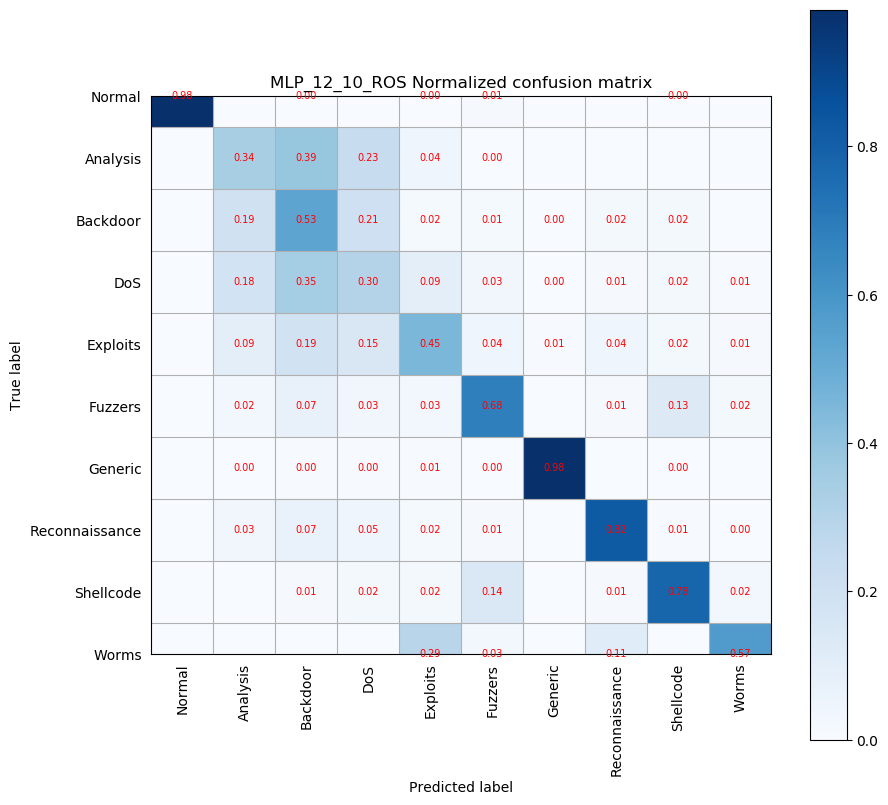

In [13]:
# -*-coding:utf-8-*-
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']
          
y_true = y_true_label
y_pred  = y_pred_label 


tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) 
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_true, y_pred)  
np.set_printoptions(precision=2)  
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

plt.figure(figsize=(10, 10), dpi=100)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.001:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='MLP_12_10_ROS Normalized confusion matrix')  
#plt.savefig('/home/hll/IDS/alldata/cm/confusion_matrix.png', format='png')  
plt.show()


In [14]:
print(cm)  

[[436888    334    539    329    551   3783      5     70    932    324]
 [     0    180    207    124     22      2      0      0      0      0]
 [     0     90    248     96      7      6      1     10      8      0]
 [     3    597   1134    986    310    113      4     37     68     17]
 [     4    835   1687   1306   4019    386     56    376    163     74]
 [     1    113    349    157    138   3312      0     47    629    103]
 [     2     91    173    201    250    162  42122     14     52     30]
 [     0     92    193    129     42     22      2   2295     19      3]
 [     0      0      3      5      5     43      0      3    237      7]
 [     0      0      0      0     10      1      0      4      0     20]]


# multi-class evaluation indicators

In [15]:
from sklearn import metrics
from sklearn.metrics import classification_report

target_names = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']
print(classification_report(y_true,y_pred,target_names=target_names))

                precision    recall  f1-score   support

        Normal       1.00      0.98      0.99    443755
      Analysis       0.08      0.34      0.13       535
      Backdoor       0.05      0.53      0.10       466
           DoS       0.30      0.30      0.30      3269
      Exploits       0.75      0.45      0.56      8906
       Fuzzers       0.42      0.68      0.52      4849
       Generic       1.00      0.98      0.99     43097
Reconnaissance       0.80      0.82      0.81      2797
     Shellcode       0.11      0.78      0.20       303
         Worms       0.03      0.57      0.07        35

      accuracy                           0.97    508012
     macro avg       0.46      0.64      0.47    508012
  weighted avg       0.98      0.97      0.97    508012



In [16]:
acc = metrics.accuracy_score(y_true,y_pred) 
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
pre = metrics.precision_score(y_true, y_pred, labels=None, pos_label=1, average='weighted')  #DR
recall = metrics.recall_score(y_true, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)


print("acc:",acc)
print("pre:",pre)
print("DR=recall:",recall)
print("f1:",f1)


acc: 0.965148461059975
pre: 0.981916760828667
DR=recall: 0.965148461059975
f1: 0.9720948109874137


# # binary-class evaluation indicators

In [ ]:
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[0,0]

acc = (TP+TN)/(TP+TN+FP+FN)
print("acc:",acc)

DR = TP/(TP+FN)  
print("DR:",DR)

FPR = FP/(FP+TN)  #FAR
print("FPR:",FPR)

recall =TP/(TP+FN)
print("recall：",recall)  

precision = TP/(TP+FP)
print("precision:",precision)

f1 = (2*precision*recall)/(precision+recall)
print("f1:",f1)